# Datos

In [3]:
import yfinance as yf
import pandas as pd

In [4]:
# Lista de empresas solo EEUU
tickers = [
    "AMZN","KO","UBER","PEP","TSLA","AAPL","MSFT","NVDA","NFLX",
    "DIS","NKE","F","WMT","PFE","META","GOOG"
]

# Descargar datos
data = yf.download(
    tickers,
    start="2020-01-01",
    end="2025-10-30",
    group_by="ticker"
)

# Convertir a formato largo (tidy)
frames = []
for ticker in tickers:
    df_temp = data[ticker].copy()
    df_temp["Ticker"] = ticker
    frames.append(df_temp)

df = pd.concat(frames)
df.reset_index(inplace=True)

# Guardar CSV
df.to_csv("Datos.csv", index=False)

print("✅ Archivo creado: Datos.csv")
df.head()


C:\Users\gabit\AppData\Local\Temp\ipykernel_1536\2594592104.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(
[*********************100%***********************]  16 of 16 completed


✅ Archivo creado: Datos.csv


Price,Date,Open,High,Low,Close,Volume,Ticker
0,2020-01-02,93.750000,94.900497,93.207497,94.900497,80580000,AMZN
1,2020-01-03,93.224998,94.309998,93.224998,93.748497,75288000,AMZN
2,2020-01-06,93.000000,95.184502,93.000000,95.143997,81236000,AMZN
3,2020-01-07,95.224998,95.694504,94.601997,95.343002,80898000,AMZN
4,2020-01-08,94.902000,95.550003,94.321999,94.598503,70160000,AMZN


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("Datos.csv")

df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values(by="Date")

df.head() #Ya está ordenado por fecha

,Date,Open,High,Low,Close,Volume,Ticker
0,2020-01-02,93.750000,94.900497,93.207497,94.900497,80580000,AMZN
2930,2020-01-02,29.940001,31.000000,29.790001,30.990000,20578900,UBER
4395,2020-01-02,115.103397,115.406147,113.648525,114.220390,3784100,PEP
5860,2020-01-02,28.299999,28.713333,28.114000,28.684000,142981500,TSLA
21975,2020-01-02,66.621598,67.942060,66.621598,67.903824,28132000,GOOG


In [12]:
def graficar_empresa(nombre_empresa):

    empresa_df = df[df["Ticker"] == nombre_empresa] # Filtrar los datos de la empresa elegida

    if empresa_df.empty:
        print(f"No se encontraron datos para la empresa: {nombre_empresa}")
        return
    
    # Crear el gráfico
    plt.figure(figsize=(10,5))
    plt.plot(empresa_df["Date"], empresa_df["Close"], label=nombre_empresa, linewidth=2)

    # Detalles estéticos
    plt.title(f"Precio histórico de {nombre_empresa}")
    plt.xlabel("Fecha")
    plt.ylabel("Precio de Cierre")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    plt.tight_layout()
    plt.show()

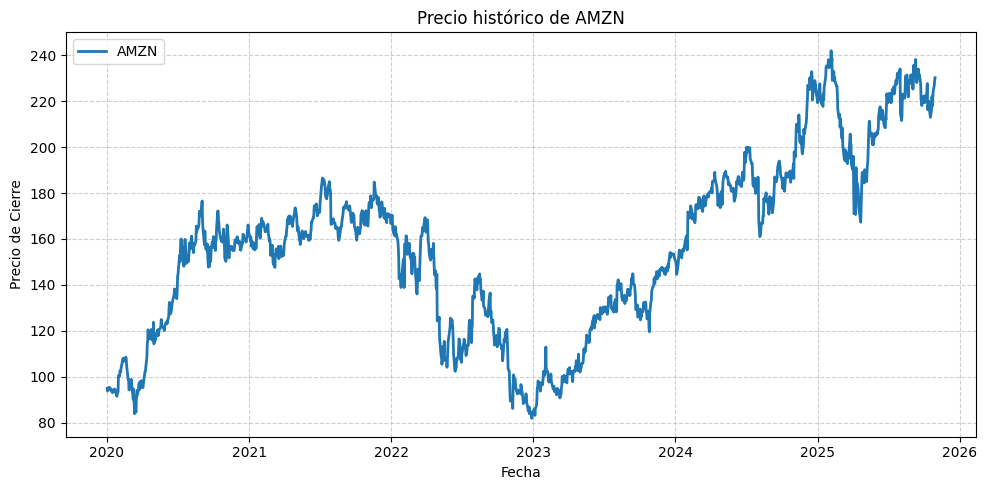

In [14]:
graficar_empresa("AMZN")